We work at a winery and that winery began to detect some problems in the quality of the wine and grape juice produced. Therefore, a professional person in the field of agronomy began taking photos of the vine leaves and identified three different problems with the leaves.

Because of this, it was determined that it would be interesting to build something capable of quickly classifying problems in grape leaves. This would allow plants to be treated quickly and efficiently. So, let's build a convolutional neural network, which is known to perform this image classification process very efficiently.

To begin to understand this problem, let's query our data and see how this data is available to us.

download data = https://cdn3.gnarususercontent.com.br/3773-tensorflow-keras-imagens-redes-convolucionais/Projeto/uvas.zip

In [2]:
url = r'C:\Users\winery'

In [3]:
import pathlib

In [4]:
data_dir = pathlib.Path(url)

In [5]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [6]:
import PIL
from PIL import Image

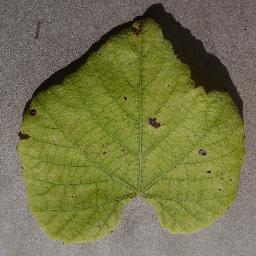

In [7]:
leafblight = list(data_dir.glob('LeafBlight/*'))
PIL.Image.open(str(leafblight[0]))

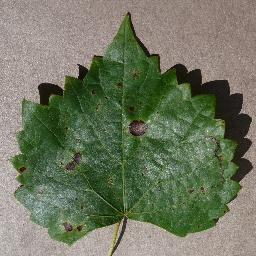

In [8]:
leafblight = list(data_dir.glob('BlackRot/*'))
PIL.Image.open(str(leafblight[0]))


We will need the NumPy library, as one of the characteristics of the images we want are the dimensions of the images.


In [9]:
from PIL import Image

imagem = Image.open(str(leafblight[0]))

print(f"Modo da imagem: {imagem.mode}")

Modo da imagem: RGB


In [10]:
import numpy as np

Now, let's go through the image directory with the following command:

In [11]:
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.JPG'))
  print(f'Class {subfolder} found {len(images)} images')

Class BlackMeasles found 400 images
Class BlackRot found 400 images
Class HealthyGrapes found 400 images
Class LeafBlight found 400 images


Now, we can see that we have 400 images inside each of the folders.

This is very interesting information, because our dataset for image classification is all balanced. We have 400 elements for each of the classes. But that's not the only information we want. We also want to know the size of the images within these folders.

In [12]:
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.JPG'))
  print(f'Class {subfolder} found {len(images)} images')

  if images:
    img = PIL.Image.open(str(images[0]))
    img_array = np.array(img)
    print(f"Dimension '{subfolder}': {img_array.shape}")

Class BlackMeasles found 400 images
Dimension 'BlackMeasles': (256, 256, 3)
Class BlackRot found 400 images
Dimension 'BlackRot': (256, 256, 3)
Class HealthyGrapes found 400 images
Dimension 'HealthyGrapes': (256, 256, 3)
Class LeafBlight found 400 images
Dimension 'LeafBlight': (256, 256, 3)


Now, we see that in addition to the fact that there are 400 images in each of the folders, the first image always has dimensions 256, 256.3. The first two numbers, here 256 by 256, are the pixel dimensions of the images. The image is 256 pixels wide by 256 pixels tall. And the third number is the number of channels in the image.


The image is divided into 3 color channels, that is, it is as if it were a combination of 3 matrices.

In [13]:
import tensorflow as tf


Now we want to load the images, but we can't load them all at once. This is because we can exceed the amount of RAM available on our machine.

We will use passing, batch loading, or batches. So, let's set the batch_size to be equal to 64, for example. Now let's define other characteristics of the images, for example, the height, which will be equal to 256 and the width, which will be equal to 256.

In [14]:
batch_size = 64
img_height = 256
img_width = 256

We have 1,600 images in total. We will use 1,280 images to train our neural network. The rest, we will use for validation, to validate our neural network. We will validate the neural network later with data that we did not see during training. To see if she generalized the problem effectively.

In [15]:
train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 568,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [16]:
validation = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 568,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


Now, we see that we have 320 images out of these 1,600 being used for validation. By doing this training and validation division, we already have some of the information from our dataset.


In [17]:
train.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [18]:
validation.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [19]:
tf.random.set_seed(424242)

In [20]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [21]:
modelo.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

If we are going to train the neural network using the default Google Colab settings, this training can take a long time, mainly depending on the number of epochs in which we are going to run this training. So let's configure Google Colab to use a GPU.

Configuring a hardware accelerator
Let's click on “Edit > Notebook Settings” in the top menu and, in the modal, select the “GPU T4” option as hardware accelerator.

In [27]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.2556 - loss: 132.5916 - val_accuracy: 0.3875 - val_loss: 43.0546
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accuracy: 0.4239 - loss: 24.3667 - val_accuracy: 0.5500 - val_loss: 4.7362
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.6209 - loss: 4.2684 - val_accuracy: 0.6625 - val_loss: 3.0342
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.6877 - loss: 2.9522 - val_accuracy: 0.6906 - val_loss: 2.4880
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.6672 - loss: 3.2796 - val_accuracy: 0.4656 - val_loss: 6.4603
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.6215 - loss: 4.3413 - val_accuracy: 0.6844 - val_loss: 4.5705
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.7603 - loss: 2.1802 - val_accuracy: 0.7344 - val_loss: 1.8901
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.7938 - loss: 1.2471 - val_accuracy

In [28]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,499,406 (288.01 MB)

 Trainable params: 25,166,468 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,332,938 (192.00 MB)

In [23]:
import matplotlib.pyplot as plt

In [29]:
def plot_results(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, 'r', label = 'Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'r', label = 'Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label = 'Validation Loss')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.show()

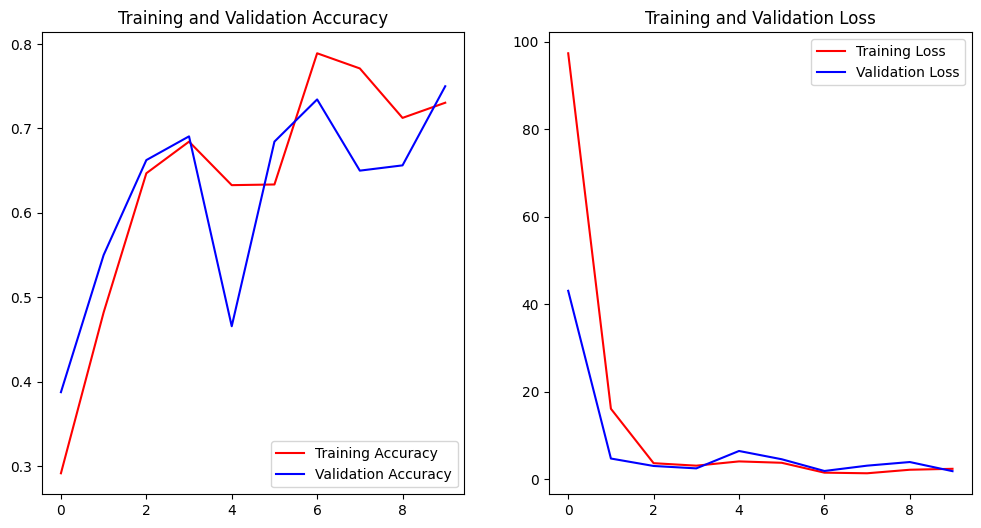

In [30]:
plot_results(history, epochs)

With this figure, we are comparing the training accuracy and the validation accuracy. In both cases, accuracy and loss, both the training and validation results evolve in a similar way, which is great!

Conclusion
We can see that we are reaching the maximum accuracy around 0.8, which would represent an accuracy of almost 80%, which is something interesting. But, can't we do better?

Our idea from now on will be to work with other layers and more advanced techniques involving neural networks, which will enable better accuracy values.

In [31]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [32]:
modelo.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [33]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 957ms/step - accuracy: 0.3054 - loss: 7.3330 - val_accuracy: 0.4531 - val_loss: 1.1756
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 944ms/step - accuracy: 0.6468 - loss: 0.8904 - val_accuracy: 0.8031 - val_loss: 0.4881
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8493 - loss: 0.3876 - val_accuracy: 0.9094 - val_loss: 0.2476
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9417 - loss: 0.1700 - val_accuracy: 0.9125 - val_loss: 0.2034
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9573 - loss: 0.1179 - val_accuracy: 0.9281 - val_loss: 0.1583
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9913 - loss: 0.0455 - val_accuracy: 0.9344 - val_loss: 0.1350
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9934 - loss: 0.0308 - val_accuracy: 0.9406 - val_loss: 0.1443
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9919 - loss: 0.0336 - val_accuracy: 0.9062 - val

In [34]:
def plot_results(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, 'r', label = 'Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'r', label = 'Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label = 'Validation Loss')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.show()

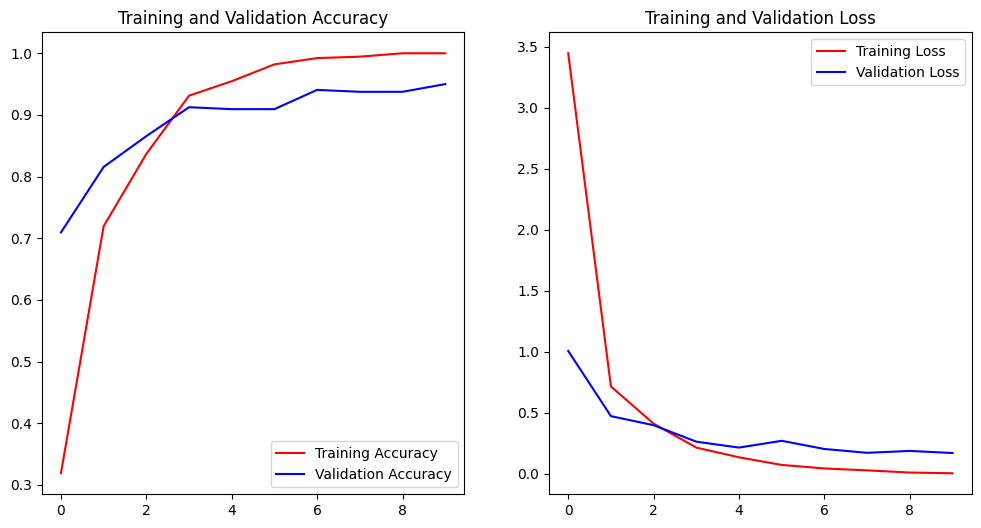

In [30]:
plot_results(history, epochs)

Analyzing the graphs

Apparently, we had a good hit rate once again, that is, good accuracy. Accuracy, both for training and validation, increases over time, and the same occurs for loss values ​​over time in relation to training and validation.

However, we identified that, in the case of the training data in the graph on the left, the accuracy reaches a value of 1.0. We can confirm this in the return from the previous cell, where there is information that, for the last epoch, the accuracy actually reached the value 1.0 (accuracy: 1.0000).

In the case of training data, when the network reaches very high values, we start to have a performance that is not even that interesting in the validation data.

In other words, we can cause the network to fit too much to the training data, and, in the case of data not seen during training, it does not work as well. So it doesn't generalize the problem as well, although it works better now than without the convolutional layers.

In [35]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

In [36]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('accuracy') > 0.93:
      print('\nReached 93% accuracy so cancelling training!')
      self.model.stop_training = True

callbacks = myCallback()

In [37]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [38]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs,
    callbacks = [callbacks]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 954ms/step - accuracy: 0.3033 - loss: 8.7395 - val_accuracy: 0.7875 - val_loss: 0.8269
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 923ms/step - accuracy: 0.7181 - loss: 0.7019 - val_accuracy: 0.8250 - val_loss: 0.5942
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8673 - loss: 0.4271 - val_accuracy: 0.8906 - val_loss: 0.2894
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9171 - loss: 0.2221
Reached 93% accuracy so cancelling training!
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9180 - loss: 0.2205 - val_accuracy: 0.9094 - val_loss: 0.2378


In the project folder, we can evaluate the images under "grapes > HealthyGrapes". Note that the sheets are very patterned. However, it may happen that the photos sent by users are slightly different from those we have in the training data.

One way to deal with this problem is to apply some technique that allows us to have a greater diversity of data. However, we trained the neural network model for a few epochs, so the first task will be to train the same neural network without the stop draws and for more epochs, to have a comparison drawdown and check how the training is working.

In [39]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
epochs = 50
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs,
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3554 - loss: 2.2979 - val_accuracy: 0.7250 - val_loss: 0.7073
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 875ms/step - accuracy: 0.7866 - loss: 0.5756 - val_accuracy: 0.8844 - val_loss: 0.3216
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8918 - loss: 0.3042 - val_accuracy: 0.9031 - val_loss: 0.2520
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9613 - loss: 0.1236 - val_accuracy: 0.9250 - val_loss: 0.2031
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9802 - loss: 0.0672 - val_accuracy: 0.9344 - val_loss: 0.1772
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9961 - loss: 0.0321 - val_accuracy: 0.9500 - val_loss: 0.1448
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9998 - loss: 0.0159 - val_accuracy: 0.9625 - val_loss: 0.1366
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9531 - val_lo

KeyboardInterrupt: 

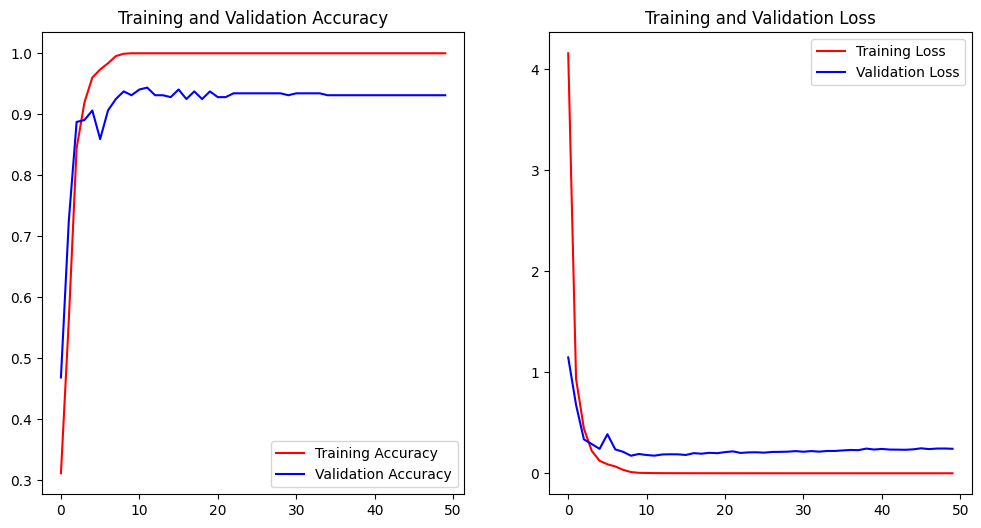

In [54]:
plot_results(history, epochs)

Note that, after a few epochs, the training data stabilizes at a value of 1.0 for accuracy. It also stabilizes for validation, but around 0.9 for accuracy.

Now let's apply the technique that will allow us to increase the database. The name of the technique is Data Augmentation, as we will add a little variability to the data.

In [41]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05)
])

In [42]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((256, 256, 3)),

    # Data Augmentation
    tf.keras.layers.Rescaling(1./255),
    data_augmentation,
    # Add convolutional layers and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [59]:
epochs = 50
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs,

)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3184 - loss: 2.5333 - val_accuracy: 0.7281 - val_loss: 0.9070
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5959 - loss: 0.8904 - val_accuracy: 0.7469 - val_loss: 0.6274
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7537 - loss: 0.6263 - val_accuracy: 0.5813 - val_loss: 1.4672
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8070 - loss: 0.4465 - val_accuracy: 0.6531 - val_loss: 1.2394
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8798 - loss: 0.3407 - val_accuracy: 0.8000 - val_loss: 0.6926
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8867 - loss: 0.2978 - val_accuracy: 0.7625 - val_loss: 0.8196
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9057 - loss: 0.2458 - val_accuracy: 0.8156 - val_loss: 0.6184
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9277 - loss: 0.2098 - val_accuracy: 0.8031 - val_loss:

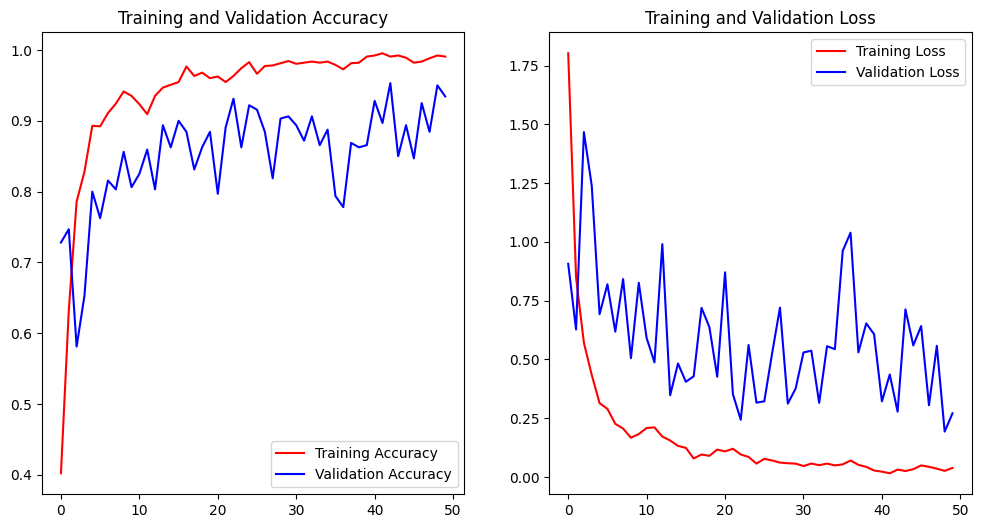

In [60]:
plot_results(history, epochs)

This may indicate some instability in the training of the neural network, in addition to being able to indicate that we do not have these characteristics that we tried to add to the validation data, such as rotation and zoom.

However, this does not mean that the method will not work on new data with these characteristics, but it leaves us with this mystery, as we do not have this extra criterion to evaluate the data.

As we trained the model, it would be interesting to save it so as not to lose our work so far.

If we observe, we obtained slightly higher accuracy values ​​on the validation data, but we also obtained a certain instability during training. This may raise doubts as to whether this model would work well in real cases, that is, whether this is an effect that we would actually observe in real data.

We will explore another type of technique that can be beneficial, using a model already trained on a much larger dataset.

We'll start by putting the shape of our input into a variable. Then, we will pass this form of input to Keras, so that it downloads the model trained on a much larger dataset. Therefore, in a new cell we will write:

In [43]:
input_shape = (256, 256, 3)

Inceptionv3 is a model with a much larger structure of convolutional layers, among other types of layers, which we will download. But this model, with this structure, may have been trained on different datasets, and we will choose a specific dataset called Imaginet.

In [44]:
model_base = tf.keras.applications.InceptionV3(input_shape = input_shape, include_top = False, weights = 'imagenet')

In [45]:
model_base.trainable = False

In [53]:
model_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 127, 127,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

It is a large model trained on an even larger dataset that is very effective in solving generic image classification problems.

We want to adapt this model to our grape leaf classification problem. To do this, we need to connect this model to the problem, rewriting some layers of the neural network, in a process similar to, but slightly different from, what we did using Sequential.

Redoing Rescaling
Let's start by redoing the data rescaling process, applying it to training and validation data

In [46]:
rescale = tf.keras.layers.Rescaling((1./255))
train = train.map(lambda x, y: (rescale(x), y))
validation = validation.map(lambda x, y: (rescale(x), y))

Let's arbitrarily decide to lock it on a specific layer, mixed7, so that the model doesn't get too big and with too many layers.

In [48]:
last_layer = model_base.get_layer('mixed7')
print('last layer:', last_layer.output.shape)
last_exiting = last_layer.output

last layer: (None, 14, 14, 768)


In [51]:
x = tf.keras.layers.Flatten()(last_exiting)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model = tf.keras.Model(inputs=model_base.input, outputs=x)

In [52]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 62, 62,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 163,121,060 (622.26 MB)

 Trainable params: 154,145,796 (588.02 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [53]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [54]:
epochs = 20
history = model.fit(
    train,
    validation_data = validation,
    epochs = epochs,

)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 145s 7s/step - accuracy: 0.5562 - loss: 11.3896 - val_accuracy: 0.9688 - val_loss: 0.2528
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 167s 8s/step - accuracy: 0.9732 - loss: 0.1613 - val_accuracy: 0.9844 - val_loss: 0.1364
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.9848 - loss: 0.0717 - val_accuracy: 0.9906 - val_loss: 0.0478
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 6s/step - accuracy: 0.9962 - loss: 0.0191 - val_accuracy: 0.9969 - val_loss: 0.0134
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 126s 6s/step - accuracy: 0.9988 - loss: 0.0018 - val_accuracy: 0.9812 - val_loss: 0.0696
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.9969 - loss: 0.0121 - val_accuracy: 0.9875 - val_loss: 0.0870
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 120s 6s/step - accuracy: 0.9984 - loss: 0.0034 - val_accuracy: 0.9937 - val_loss: 0.0477
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 1.0000 - loss: 6.0159e-04 - val_accuracy: 0.996

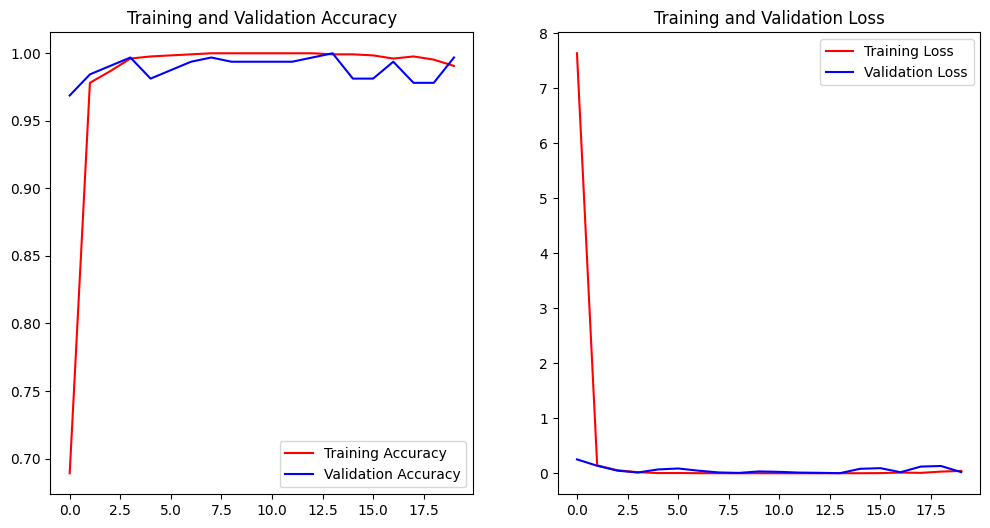

In [56]:
plot_results(history, epochs)

We have reached the end of the training process. If we observe, we arrive again with accuracy values ​​for the training data equal to 1, which are very high values, which could even suggest some overfitting. However, in the validation data we are also reaching very high accuracy values, which are around 0.99, a high value that we have not reached with other techniques we have used previously.

From this data, we will assume that we are not experiencing an overfitting process and the model is working well. Therefore, we will adopt this model as being the best we have obtained.

Saving the Model

In [57]:
model.save('model.h5', include_optimizer = False)

In [58]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [59]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

In [60]:
model_tflite = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\vikto\AppData\Local\Temp\tmph7j0hrka\assets


INFO:tensorflow:Assets written to: C:\Users\vikto\AppData\Local\Temp\tmph7j0hrka\assets


Saved artifact at 'C:\Users\vikto\AppData\Local\Temp\tmph7j0hrka'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_46')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1577140232912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140232720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140233680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140233488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140232144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140234256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140235216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140235024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140233872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1577140235792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15

In [61]:
with open('model_16bits.tflite', 'wb') as f:
  f.write(model_tflite)